In [1]:
import pandas as pd
import numpy as np

In [2]:
df_blood = pd.read_csv('results_merged/heatmap_blood_bag.csv')
df_brain = pd.read_csv('results_merged/heatmap_brain_bag.csv')

In [3]:
df = pd.concat([df_blood, df_brain.iloc[:, 1:]], axis=1)
log10p = df.iloc[:, 1:].values

In [4]:
# significant threshold
sig_thres = -np.log10(0.05)
sig_num = np.sum(np.abs(log10p) > sig_thres, axis=1)
sig_num_neg = np.sum(log10p < -sig_thres, axis=1)
sig_num_pos = np.sum(log10p > sig_thres, axis=1)

In [5]:
# count significant GENES for each phenotype
df_cnt = df[['pheno']].copy()
df_cnt['sig_num'] = sig_num
df_cnt['sig_num_pos'] = sig_num_pos
df_cnt['sig_num_neg'] = sig_num_neg

In [6]:
# sort by sig_num
df_cnt = df_cnt.sort_values(by=['sig_num', 'sig_num_pos'], ascending=False)
df_cnt['sig_num_neg'] = -df_cnt['sig_num_neg']

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams['font.family'] = 'Arial'

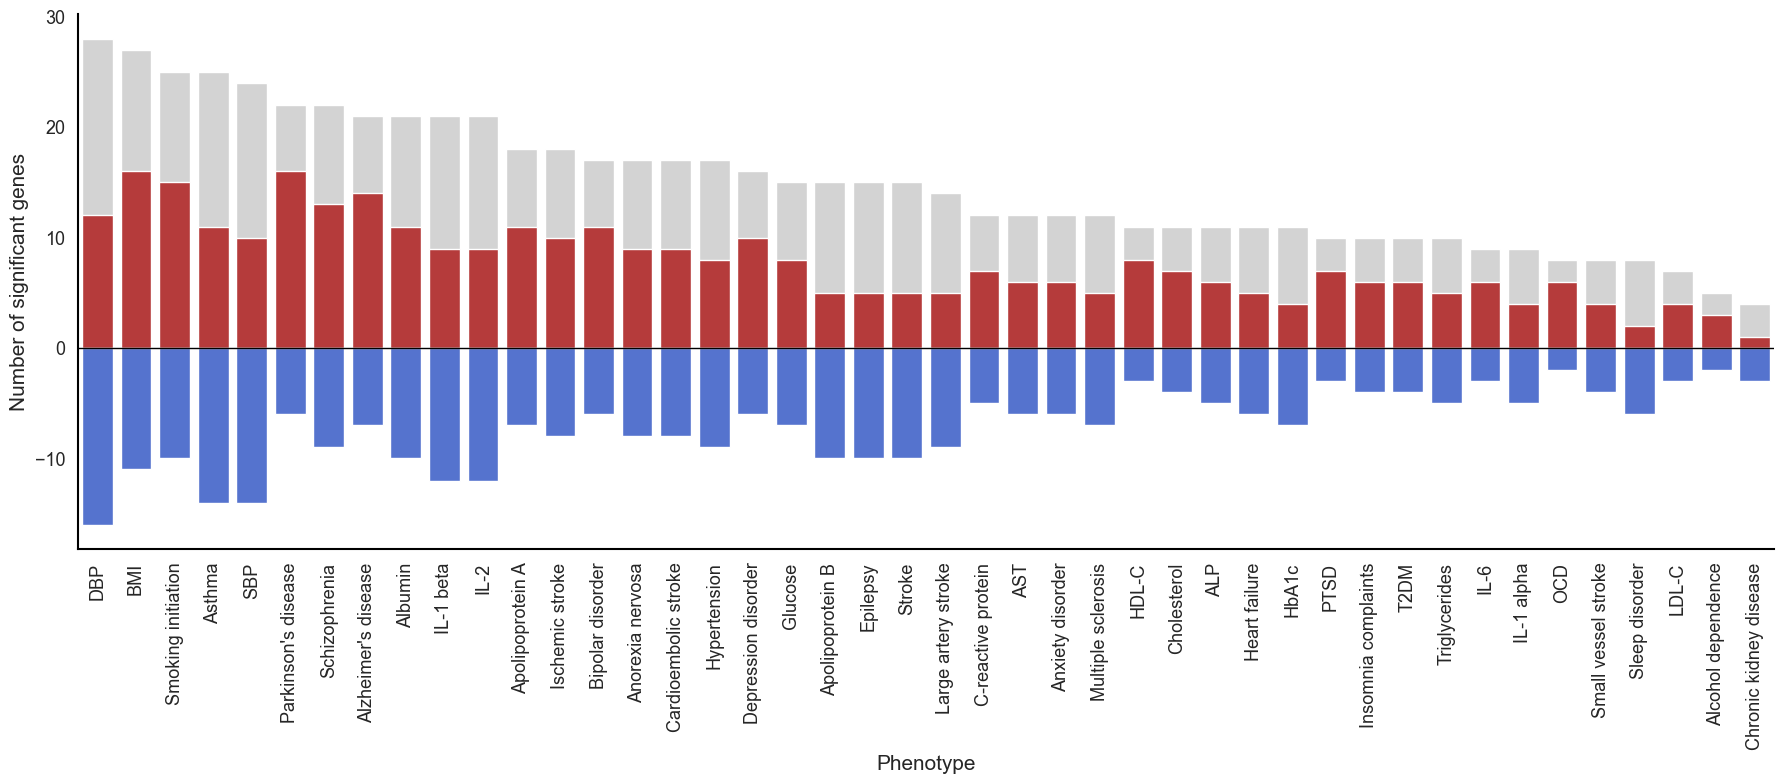

In [8]:
# bar plot shows the number of significant genes for each phenotype
# and number of positive and negative significant genes in a figure
fig, ax = plt.subplots(figsize=(18, 8))
# set bar 
sns.barplot(x='pheno', y='sig_num', data=df_cnt, ax=ax, color='lightgray')
sns.barplot(x='pheno', y='sig_num_pos', data=df_cnt, ax=ax, color='#CA2726')
sns.barplot(x='pheno', y='sig_num_neg', data=df_cnt, ax=ax, color='#4169E2')
ax.set_ylabel('Number of significant genes', fontsize=15)
ax.set_xlabel('Phenotype', fontsize=15)
# ax.set_title('Number of significant genes for each phenotype')
# set grid lines type to dashed
ax.grid(axis='y', linestyle='None')

# set ticklabels fontsize
ax.tick_params(axis='both', labelsize=13)

# add line y=0
ax.axhline(y=0, color='black', linewidth=1)

# set spines color to black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# set spines linewidth to 1.5
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# remove top, bottom right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# rotate xticklabels 90 degrees
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('results_merged/heatmap_sig_num.jpg', dpi=300)
plt.show()

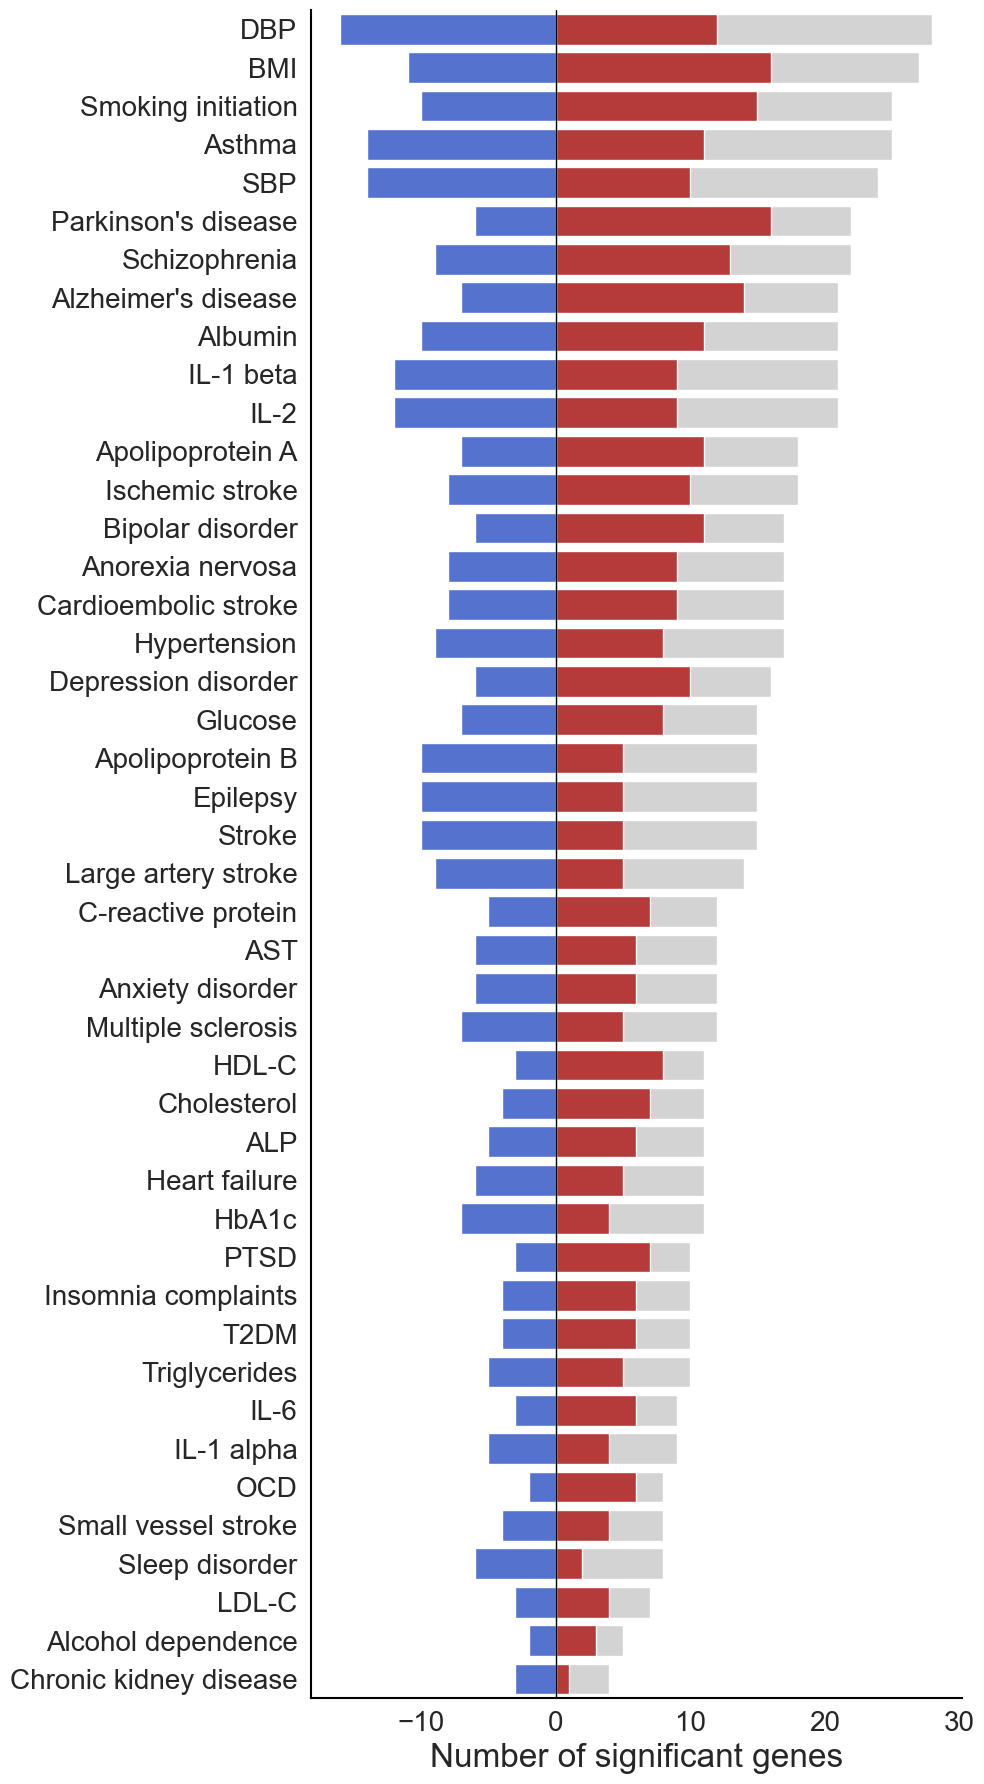

In [9]:
# bar plot shows the number of significant genes for each phenotype
# and number of positive and negative significant genes in a figure
fig, ax = plt.subplots(figsize=(10, 18))
# bar 
# set bar close to each other
sns.barplot(y='pheno', x='sig_num', data=df_cnt, ax=ax, color='lightgray')
sns.barplot(y='pheno', x='sig_num_pos', data=df_cnt, ax=ax, color='#CA2726')
sns.barplot(y='pheno', x='sig_num_neg', data=df_cnt, ax=ax, color='#4169E2')
ax.set_xlabel('Number of significant genes', fontsize=24)
ax.set_ylabel('', fontsize=18)
# ax.set_title('Number of significant genes for each phenotype')
# set grid lines type to dashed
ax.grid(axis='x', linestyle='None')

# set ticklabels fontsize
ax.tick_params(axis='both', labelsize=13)

# add line y=0
ax.axvline(x=0, color='black', linewidth=1)

# set spines color to black
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# set spines linewidth to 1.5
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# remove top, bottom right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# rotate xticklabels 90 degrees
plt.xticks(fontsize=20)
# bold yticklabels
# plt.yticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('results_merged/heatmap_sig_num.jpg', dpi=300)
plt.show()